# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<!-- <table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table> -->

| Data Property             | Description  |
| ---                       | ---          |
| Data Set Characteristics  | Multivariate |
| Number of Instances       | 1030         |
| Area                      | Physical     |
| Attribute Characteristics | Real         |
| Number of Attributes      | 9            |
| Date Donated              | 2007-08-03   |
| Associated Tasks          | Regression   |
| Missing Values            | N/A          |
| Number of Web Hits        | 231,464      |

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


### Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

# Solution

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from tensorflow.keras import models, layers

In [2]:
df = pd.read_csv('./data/compressive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## 2. Check Missing Values

In [4]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

## 3. Splitting Data

In [5]:
X = df.drop(df.columns.values[-1], axis=1).copy(deep=True)
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [6]:
y = df[df.columns.values[-1]].copy(deep=True)
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
X.columns.values

array(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype=object)

## 4. Data Normalization

In [9]:
normalizer = [('StandardScalar', StandardScaler(), X.columns.values)]
columnTransformer = ColumnTransformer(transformers=normalizer)


In [10]:
X_train_n = columnTransformer.fit_transform(X_train)
X_test_n = columnTransformer.transform(X_test)

X_train_n.shape, X_test_n.shape

((721, 8), (309, 8))

## 5. Model

In [11]:
model = models.Sequential()

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1))

## 6. Compilation

In [12]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 7. Training

In [13]:
history = model.fit(X_train_n, y_train.to_numpy(), validation_split=2/7, epochs=400)

Epoch 1/400
17/17 [==============================] - 0s 12ms/step - loss: 1462.0588 - mae: 34.2564 - val_loss: 1507.1056 - val_mae: 35.2405
Epoch 2/400
17/17 [==============================] - 0s 7ms/step - loss: 1415.7114 - mae: 33.6140 - val_loss: 1452.3474 - val_mae: 34.5295
Epoch 3/400
17/17 [==============================] - 0s 3ms/step - loss: 1362.6176 - mae: 32.8692 - val_loss: 1390.2034 - val_mae: 33.6997
Epoch 4/400
17/17 [==============================] - 0s 3ms/step - loss: 1297.7277 - mae: 31.9379 - val_loss: 1312.2349 - val_mae: 32.6257
Epoch 5/400
17/17 [==============================] - 0s 2ms/step - loss: 1215.4139 - mae: 30.7012 - val_loss: 1214.3723 - val_mae: 31.2135
Epoch 6/400
17/17 [==============================] - 0s 2ms/step - loss: 1116.3701 - mae: 29.1452 - val_loss: 1098.7351 - val_mae: 29.4361
Epoch 7/400
17/17 [==============================] - 0s 2ms/step - loss: 997.6868 - mae: 27.2283 - val_loss: 966.6037 - val_mae: 27.2574
Epoch 8/400
17/17 [=========

## 8. Model Tuning

In [14]:
training_history = history.history
training_history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [15]:
err_train = training_history['mae']
err_val = training_history['val_mae']
epochs = range(1, len(err_val)+1)

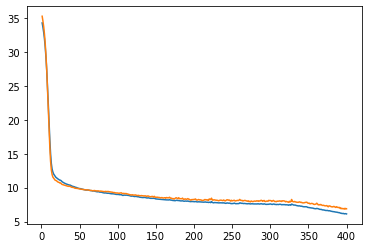

In [16]:
fig, ax = plt.subplots(1)
training_error = ax.plot(epochs, err_train, label='Training Error')
validation_error = ax.plot(epochs, err_val, label='Validation Error')

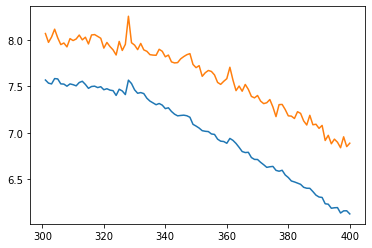

In [17]:
fig, ax = plt.subplots(1)
training_error = ax.plot(epochs[300:], err_train[300:], label='Training Error')
validation_error = ax.plot(epochs[300:], err_val[300:], label='Validation Error')

The validation error is close to training error (less overfitting) around epcoh 345. New model will be trained based on this value

In [18]:
model_2 = models.Sequential()

model_2.add(layers.Dense(10, activation='relu'))
model_2.add(layers.Dense(8, activation='relu'))
model_2.add(layers.Dense(6, activation='relu'))

model_2.add(layers.Dense(1))

model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_2 = model_2.fit(X_train_n, y_train.to_numpy(), validation_split=2/7, epochs=345)

Epoch 1/345
17/17 [==============================] - 0s 12ms/step - loss: 1563.4274 - mae: 35.5750 - val_loss: 1634.3040 - val_mae: 36.8072
Epoch 2/345
17/17 [==============================] - 0s 1ms/step - loss: 1551.0740 - mae: 35.4046 - val_loss: 1621.1636 - val_mae: 36.6347
Epoch 3/345
17/17 [==============================] - 0s 2ms/step - loss: 1538.3844 - mae: 35.2348 - val_loss: 1607.0262 - val_mae: 36.4560
Epoch 4/345
17/17 [==============================] - 0s 3ms/step - loss: 1523.4974 - mae: 35.0376 - val_loss: 1590.1074 - val_mae: 36.2359
Epoch 5/345
17/17 [==============================] - 0s 3ms/step - loss: 1504.6000 - mae: 34.7820 - val_loss: 1568.4498 - val_mae: 35.9478
Epoch 6/345
17/17 [==============================] - 0s 3ms/step - loss: 1480.2485 - mae: 34.4462 - val_loss: 1538.9401 - val_mae: 35.5443
Epoch 7/345
17/17 [==============================] - 0s 3ms/step - loss: 1446.4170 - mae: 33.9625 - val_loss: 1498.6549 - val_mae: 34.9832
Epoch 8/345
17/17 [=======

## 9. Evaluation

In [19]:
model_2.evaluate(X_test_n, y_test.to_numpy())

10/10 [==============================] - 0s 1ms/step - loss: 50.4568 - mae: 5.4686


[50.45677947998047, 5.468621253967285]

## 10. Predictions

In [20]:
y_test_preds = model_2.predict(X_test_n)
y_test_preds

array([[18.11384  ],
       [ 9.836805 ],
       [29.429379 ],
       [43.790146 ],
       [36.273632 ],
       [50.931347 ],
       [32.26261  ],
       [41.671345 ],
       [44.225887 ],
       [38.41961  ],
       [60.99101  ],
       [46.86494  ],
       [26.013071 ],
       [26.17056  ],
       [45.63756  ],
       [18.659685 ],
       [36.728676 ],
       [31.590708 ],
       [34.706257 ],
       [42.121113 ],
       [18.555449 ],
       [28.831144 ],
       [19.296835 ],
       [ 4.9610834],
       [23.963982 ],
       [61.71549  ],
       [51.048798 ],
       [32.134876 ],
       [57.64958  ],
       [17.212208 ],
       [38.411404 ],
       [30.946552 ],
       [10.087799 ],
       [49.4249   ],
       [41.26472  ],
       [13.864794 ],
       [45.422684 ],
       [66.915565 ],
       [58.63454  ],
       [27.308035 ],
       [14.2606735],
       [68.70212  ],
       [26.987387 ],
       [46.03752  ],
       [39.15123  ],
       [45.119152 ],
       [44.075924 ],
       [17.84